In [1]:
import pandas as pd
import numpy as np                     
import seaborn as sns                  
import matplotlib.pyplot as plt 
import seaborn as sn                   

import warnings                        
warnings.filterwarnings("ignore")

In [2]:
df_train=pd.read_excel(r'C:\Users\91980\OneDrive\Desktop\termdeposit_train.xlsx')
df_test=pd.read_excel(r"C:\Users\91980\OneDrive\Desktop\termdeposit_test.xlsx")

In [3]:
df_train.columns

Index(['ID', 'age', 'job', 'marital', 'education', 'default', 'balance',
       'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign',
       'pdays', 'previous', 'poutcome', 'subscribed'],
      dtype='object')

In [4]:
df_test.columns

Index(['ID', 'age', 'job', 'marital', 'education', 'default', 'balance',
       'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign',
       'pdays', 'previous', 'poutcome'],
      dtype='object')

In [5]:
df_train.shape,df_test.shape

((31647, 18), (13564, 17))

In [6]:
df_train.dtypes

ID             int64
age            int64
job           object
marital       object
education     object
default       object
balance        int64
housing       object
loan          object
contact       object
day            int64
month         object
duration       int64
campaign       int64
pdays          int64
previous       int64
poutcome      object
subscribed    object
dtype: object

In [7]:
df_train.head()

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,26110,56,admin.,married,unknown,no,1933,no,no,telephone,19,nov,44,2,-1,0,unknown,no
1,40576,31,unknown,married,secondary,no,3,no,no,cellular,20,jul,91,2,-1,0,unknown,no
2,15320,27,services,married,secondary,no,891,yes,no,cellular,18,jul,240,1,-1,0,unknown,no
3,43962,57,management,divorced,tertiary,no,3287,no,no,cellular,22,jun,867,1,84,3,success,yes
4,29842,31,technician,married,secondary,no,119,yes,no,cellular,4,feb,380,1,-1,0,unknown,no


In [8]:
df_train['subscribed'].value_counts()

no     27932
yes     3715
Name: subscribed, dtype: int64

<AxesSubplot:>

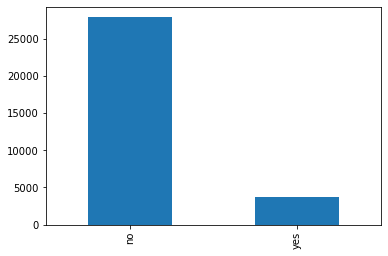

In [9]:
df_train['subscribed'].value_counts().plot.bar()

<AxesSubplot:xlabel='age', ylabel='Density'>

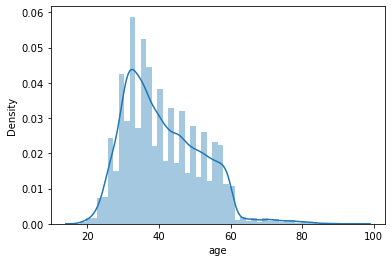

In [10]:
sns.distplot(df_train['age'])

<AxesSubplot:>

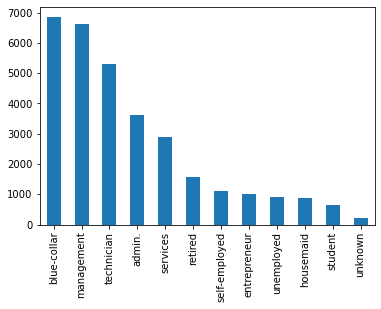

In [11]:
df_train['job'].value_counts().plot.bar()

<AxesSubplot:>

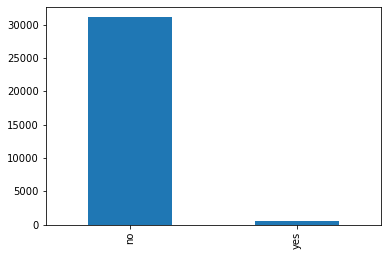

In [12]:
df_train['default'].value_counts().plot.bar()

In [13]:
print(pd.crosstab(df_train['job'],df_train['subscribed']))

subscribed       no  yes
job                     
admin.         3179  452
blue-collar    6353  489
entrepreneur    923   85
housemaid       795   79
management     5716  923
retired        1212  362
self-employed   983  140
services       2649  254
student         453  182
technician     4713  594
unemployed      776  129
unknown         180   26


In [14]:
job=pd.crosstab(df_train['job'],df_train['subscribed'])

Text(0, 0.5, 'percentage')

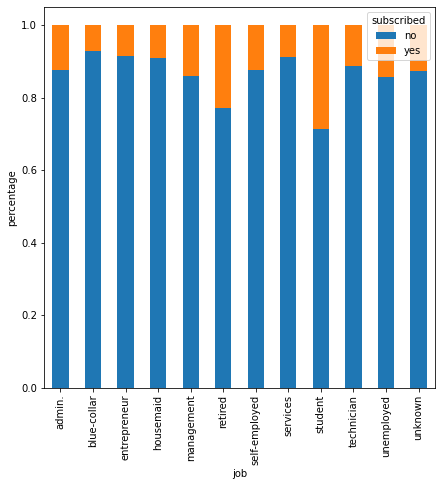

In [15]:
job.div(job.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(7,7))
plt.xlabel('job')
plt.ylabel('percentage')

subscribed     no   yes
default                
no          27388  3674
yes           544    41


Text(0, 0.5, 'Percentage')

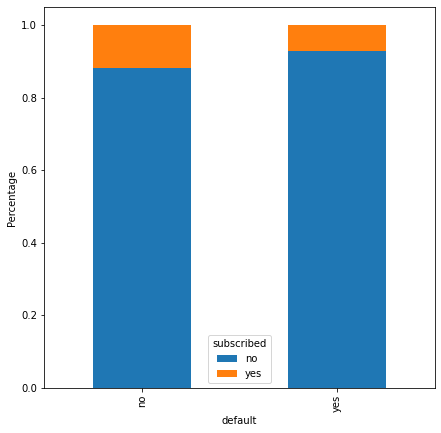

In [16]:
print(pd.crosstab(df_train['default'],df_train['subscribed']))

default=pd.crosstab(df_train['default'],df_train['subscribed'])
default.div(default.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(7,7))
plt.xlabel('default')
plt.ylabel('Percentage')

In [17]:
df_train['subscribed'].replace('no', 0,inplace=True)
df_train['subscribed'].replace('yes', 1,inplace=True)

<AxesSubplot:>

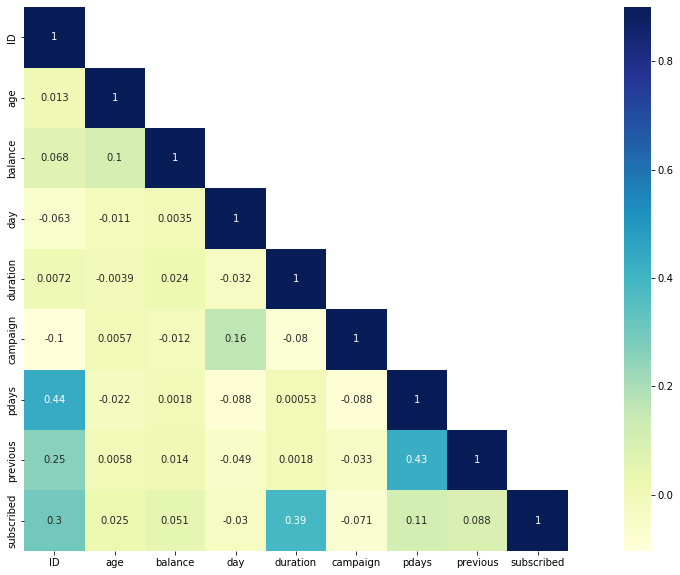

In [18]:
corr = df_train.corr()
mask = np.array(corr)
mask[np.tril_indices_from(mask)] = False
fig,ax= plt.subplots()
fig.set_size_inches(20,10)
sn.heatmap(corr, mask=mask,vmax=.9, square=True,annot=True, cmap="YlGnBu")

In [19]:
df_train.isnull().sum()

ID            0
age           0
job           0
marital       0
education     0
default       0
balance       0
housing       0
loan          0
contact       0
day           0
month         0
duration      0
campaign      0
pdays         0
previous      0
poutcome      0
subscribed    0
dtype: int64

In [20]:
target = df_train['subscribed']
train = df_train.drop('subscribed',1)

In [21]:
train = pd.get_dummies(train)

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
X_train, X_val, y_train, y_val = train_test_split(train, target, test_size = 0.2, random_state=12)

In [24]:
from sklearn.linear_model import LogisticRegression

In [25]:
lg=LogisticRegression()

In [26]:
lg.fit(X_train,y_train)

LogisticRegression()

In [27]:
from sklearn.metrics import accuracy_score

In [28]:
prediction=lg.predict(X_val)

In [29]:
accuracy_score(y_val,prediction)

0.8889415481832543

In [30]:
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier(max_depth=4,random_state=0)
dtc.fit(X_train,y_train)
predict=dtc.predict(X_val)
accuracy_score(y_val,predict)

0.9042654028436019

In [31]:
test=pd.get_dummies(df_test)

In [32]:
test_prediction=dtc.predict(test)

In [33]:
sub=pd.DataFrame()

In [34]:
sub['ID']=test['ID']
sub['Subscribed']=test_prediction

In [35]:
sub['Subscribed'].replace(0,'No',inplace=True)

sub['Subscribed'].replace(1,'Yes',inplace=True)

In [37]:
sub.to_csv('subscription.csv',header=True,index=False)
#save the client subscribed a term deposit in csv file
